In [1]:
import pandas as pd
import numpy as np

# Reshaping and Pivot Tables

指数编制中，我们常常需要对时间序列进行分析，最常遇到的时间序列数据格式如下

In [2]:
df_wide = pd.DataFrame(np.random.randn(10, 5),
                  index=pd.date_range("2018-01-01", periods=10, name="trade_date"),
                  columns=pd.Index(["000001.SZ", "000002.SZ", "600000.SH", "600001.SH", "600002.SH"], name="code"))

In [3]:
df_wide.iloc[[3, 4], [2, 3]] = np.nan

In [4]:
df_wide

code        000001.SZ  000002.SZ  600000.SH  600001.SH  600002.SH
trade_date                                                       
2018-01-01   0.695357  -0.412751  -0.712669   0.727236   1.496053
2018-01-02  -0.135971  -1.308295  -0.394615  -1.127327  -1.101198
2018-01-03   0.726460   0.516211  -0.310729   0.503638   1.436077
2018-01-04  -0.526034   0.392644        NaN        NaN   0.144914
2018-01-05   1.606631   0.097745        NaN        NaN   0.869176
2018-01-06   1.916955  -0.863136  -0.791919   1.676059   1.754934
2018-01-07   1.225358  -0.346188   0.694380   1.830963  -0.541853
2018-01-08   0.467991  -0.475014  -0.144900  -1.145801   0.354757
2018-01-09   0.645899  -1.156531  -0.488898  -1.610366   0.676623
2018-01-10   1.467346   0.249756  -0.050136   1.204845   0.323247

但在数据库中，数据通常是以下面的形式存储的。

In [6]:
df_long = df_wide.stack(-1).reset_index()
df_long.rename({0: "return"},axis=1, inplace=True)
df_long

trade_date       code    return
0  2018-01-01  000001.SZ  0.695357
1  2018-01-01  000002.SZ -0.412751
2  2018-01-01  600000.SH -0.712669
3  2018-01-01  600001.SH  0.727236
4  2018-01-01  600002.SH  1.496053
5  2018-01-02  000001.SZ -0.135971
6  2018-01-02  000002.SZ -1.308295
7  2018-01-02  600000.SH -0.394615
8  2018-01-02  600001.SH -1.127327
9  2018-01-02  600002.SH -1.101198
10 2018-01-03  000001.SZ  0.726460
11 2018-01-03  000002.SZ  0.516211
12 2018-01-03  600000.SH -0.310729
13 2018-01-03  600001.SH  0.503638
14 2018-01-03  600002.SH  1.436077
15 2018-01-04  000001.SZ -0.526034
16 2018-01-04  000002.SZ  0.392644
17 2018-01-04  600002.SH  0.144914
18 2018-01-05  000001.SZ  1.606631
19 2018-01-05  000002.SZ  0.097745
20 2018-01-05  600002.SH  0.869176
21 2018-01-06  000001.SZ  1.916955
22 2018-01-06  000002.SZ -0.863136
23 2018-01-06  600000.SH -0.791919
24 2018-01-06  600001.SH  1.676059
25 2018-01-06  600002.SH  1.754934
26 2018-01-07  000001.SZ  1.225358
27 2018-01-07  000002.SZ -0.346188
28 2018-01-07  600000.SH  0.694380
29 2018-01-07  600001.SH  1.830963
30 2018-01-07  600002.SH -0.541853
31 2018-01-08  000001.SZ  0.467991
32 2018-01-08  000002.SZ -0.475014
33 2018-01-08  600000.SH -0.144900
34 2018-01-08  600001.SH -1.145801
35 2018-01-08  600002.SH  0.354757
36 2018-01-09  000001.SZ  0.645899
37 2018-01-09  000002.SZ -1.156531
38 2018-01-09  600000.SH -0.488898
39 2018-01-09  600001.SH -1.610366
40 2018-01-09  600002.SH  0.676623
41 2018-01-10  000001.SZ  1.467346
42 2018-01-10  000002.SZ  0.249756
43 2018-01-10  600000.SH -0.050136
44 2018-01-10  600001.SH  1.204845
45 2018-01-10  600002.SH  0.323247

上下两种数据格式都是很常用的，但是他们各自都有各自的优劣势：

第一种格式的数据我们称之为宽格式数据，该类型数据的优势是，比较容易进行各种时间序列及截面的计算。   
第二种格式的数据我们称之为长格式数据，该类型数据的优势是，比较容易进行存储，以及用二维格式表示三维或更高维度数据。

在进行时间序列运算时，我们更常用的是宽格式数据，因为这种数据比较适合计算，而有时候我们又需要将宽格式数据转换成长格式数据，以进行数据的存储和交互，例如，我们的指数分析模块接收的数据就是一种长格式的数据。

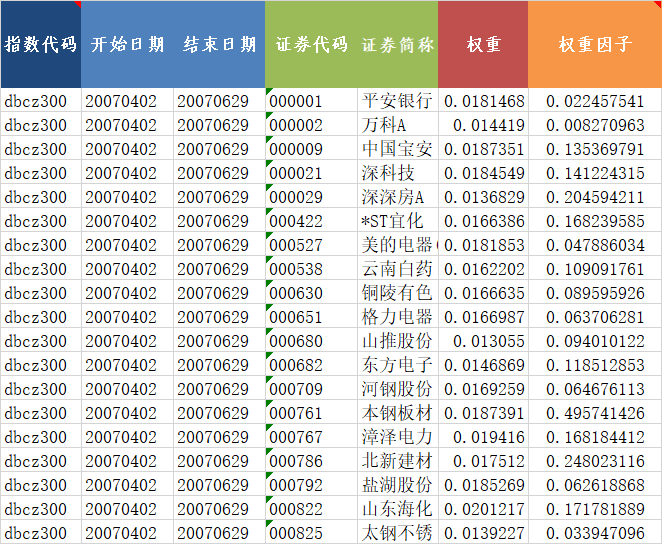




长格式数据与宽格式数据的交互就是我们这次的主要内容

## pivot

从数据库等数据来源获取长格式数据的DataFrame之后，可以使用pivot方法将其转换为宽格式数据

我们继续使用上面的数据作为例子

In [7]:
df_long2 = df_long.copy()
df_long2["close"] = np.random.randn(df_long2.shape[0])
df_long2

trade_date       code    return     close
0  2018-01-01  000001.SZ  0.695357 -0.019504
1  2018-01-01  000002.SZ -0.412751  0.730330
2  2018-01-01  600000.SH -0.712669  0.902919
3  2018-01-01  600001.SH  0.727236 -1.275113
4  2018-01-01  600002.SH  1.496053 -0.468383
5  2018-01-02  000001.SZ -0.135971  0.828318
6  2018-01-02  000002.SZ -1.308295  1.939643
7  2018-01-02  600000.SH -0.394615  0.545775
8  2018-01-02  600001.SH -1.127327 -0.053806
9  2018-01-02  600002.SH -1.101198 -0.944375
10 2018-01-03  000001.SZ  0.726460  0.376477
11 2018-01-03  000002.SZ  0.516211  0.573114
12 2018-01-03  600000.SH -0.310729  0.203142
13 2018-01-03  600001.SH  0.503638  1.126025
14 2018-01-03  600002.SH  1.436077 -1.032509
15 2018-01-04  000001.SZ -0.526034 -1.488156
16 2018-01-04  000002.SZ  0.392644  0.062163
17 2018-01-04  600002.SH  0.144914  0.271830
18 2018-01-05  000001.SZ  1.606631 -0.961383
19 2018-01-05  000002.SZ  0.097745  0.308845
20 2018-01-05  600002.SH  0.869176  0.176021
21 2018-01-06  000001.SZ  1.916955 -1.432237
22 2018-01-06  000002.SZ -0.863136 -1.259291
23 2018-01-06  600000.SH -0.791919 -1.359579
24 2018-01-06  600001.SH  1.676059 -0.102069
25 2018-01-06  600002.SH  1.754934 -0.374617
26 2018-01-07  000001.SZ  1.225358  0.204203
27 2018-01-07  000002.SZ -0.346188  0.088978
28 2018-01-07  600000.SH  0.694380  0.879234
29 2018-01-07  600001.SH  1.830963  1.134740
30 2018-01-07  600002.SH -0.541853  0.262291
31 2018-01-08  000001.SZ  0.467991 -0.524822
32 2018-01-08  000002.SZ -0.475014 -0.058682
33 2018-01-08  600000.SH -0.144900 -0.459479
34 2018-01-08  600001.SH -1.145801  0.475239
35 2018-01-08  600002.SH  0.354757 -2.079395
36 2018-01-09  000001.SZ  0.645899  0.690157
37 2018-01-09  000002.SZ -1.156531  0.221372
38 2018-01-09  600000.SH -0.488898 -0.327802
39 2018-01-09  600001.SH -1.610366 -1.414584
40 2018-01-09  600002.SH  0.676623 -0.047473
41 2018-01-10  000001.SZ  1.467346 -0.872336
42 2018-01-10  000002.SZ  0.249756  0.853831
43 2018-01-10  600000.SH -0.050136  1.929506
44 2018-01-10  600001.SH  1.204845  1.775208
45 2018-01-10  600002.SH  0.323247  0.122405

在指定了index和columns后,pivot方法可以轻松实现数据格式转换.

但是要稍稍注意一下,values参数为单个列标签和list of 列标签的区别  
values参数为单个列标签时,生成的DataFrame的columns为Index  
values参数为list of 列标签时,生成的DataFrame的columns为MultiIndex

In [8]:
df_long2.pivot(index="trade_date", columns="code", values="return")

code        000001.SZ  000002.SZ  600000.SH  600001.SH  600002.SH
trade_date                                                       
2018-01-01   0.695357  -0.412751  -0.712669   0.727236   1.496053
2018-01-02  -0.135971  -1.308295  -0.394615  -1.127327  -1.101198
2018-01-03   0.726460   0.516211  -0.310729   0.503638   1.436077
2018-01-04  -0.526034   0.392644        NaN        NaN   0.144914
2018-01-05   1.606631   0.097745        NaN        NaN   0.869176
2018-01-06   1.916955  -0.863136  -0.791919   1.676059   1.754934
2018-01-07   1.225358  -0.346188   0.694380   1.830963  -0.541853
2018-01-08   0.467991  -0.475014  -0.144900  -1.145801   0.354757
2018-01-09   0.645899  -1.156531  -0.488898  -1.610366   0.676623
2018-01-10   1.467346   0.249756  -0.050136   1.204845   0.323247

In [9]:
df_long2.pivot(index="trade_date", columns="code", values="return").columns

Index(['000001.SZ', '000002.SZ', '600000.SH', '600001.SH', '600002.SH'], dtype='object', name='code')

In [10]:
df_long2.pivot(index="trade_date", columns="code", values=["return", "close"])

return                                             close  \
code       000001.SZ 000002.SZ 600000.SH 600001.SH 600002.SH 000001.SZ   
trade_date                                                               
2018-01-01  0.695357 -0.412751 -0.712669  0.727236  1.496053 -0.019504   
2018-01-02 -0.135971 -1.308295 -0.394615 -1.127327 -1.101198  0.828318   
2018-01-03  0.726460  0.516211 -0.310729  0.503638  1.436077  0.376477   
2018-01-04 -0.526034  0.392644       NaN       NaN  0.144914 -1.488156   
2018-01-05  1.606631  0.097745       NaN       NaN  0.869176 -0.961383   
2018-01-06  1.916955 -0.863136 -0.791919  1.676059  1.754934 -1.432237   
2018-01-07  1.225358 -0.346188  0.694380  1.830963 -0.541853  0.204203   
2018-01-08  0.467991 -0.475014 -0.144900 -1.145801  0.354757 -0.524822   
2018-01-09  0.645899 -1.156531 -0.488898 -1.610366  0.676623  0.690157   
2018-01-10  1.467346  0.249756 -0.050136  1.204845  0.323247 -0.872336   

                                                    
code       000002.SZ 600000.SH 600001.SH 600002.SH  
trade_date                                          
2018-01-01  0.730330  0.902919 -1.275113 -0.468383  
2018-01-02  1.939643  0.545775 -0.053806 -0.944375  
2018-01-03  0.573114  0.203142  1.126025 -1.032509  
2018-01-04  0.062163       NaN       NaN  0.271830  
2018-01-05  0.308845       NaN       NaN  0.176021  
2018-01-06 -1.259291 -1.359579 -0.102069 -0.374617  
2018-01-07  0.088978  0.879234  1.134740  0.262291  
2018-01-08 -0.058682 -0.459479  0.475239 -2.079395  
2018-01-09  0.221372 -0.327802 -1.414584 -0.047473  
2018-01-10  0.853831  1.929506  1.775208  0.122405

In [11]:
df_long.pivot(index="trade_date", columns="code", values=["return"])

return                                        
code       000001.SZ 000002.SZ 600000.SH 600001.SH 600002.SH
trade_date                                                  
2018-01-01  0.695357 -0.412751 -0.712669  0.727236  1.496053
2018-01-02 -0.135971 -1.308295 -0.394615 -1.127327 -1.101198
2018-01-03  0.726460  0.516211 -0.310729  0.503638  1.436077
2018-01-04 -0.526034  0.392644       NaN       NaN  0.144914
2018-01-05  1.606631  0.097745       NaN       NaN  0.869176
2018-01-06  1.916955 -0.863136 -0.791919  1.676059  1.754934
2018-01-07  1.225358 -0.346188  0.694380  1.830963 -0.541853
2018-01-08  0.467991 -0.475014 -0.144900 -1.145801  0.354757
2018-01-09  0.645899 -1.156531 -0.488898 -1.610366  0.676623
2018-01-10  1.467346  0.249756 -0.050136  1.204845  0.323247

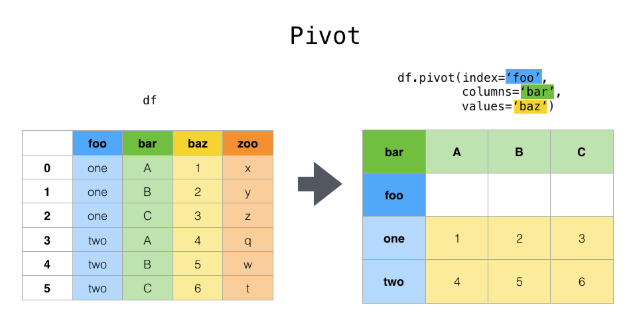

如果要实现类似unpivot的操作,需要使用stack函数

In [12]:
df_wide

code        000001.SZ  000002.SZ  600000.SH  600001.SH  600002.SH
trade_date                                                       
2018-01-01   0.695357  -0.412751  -0.712669   0.727236   1.496053
2018-01-02  -0.135971  -1.308295  -0.394615  -1.127327  -1.101198
2018-01-03   0.726460   0.516211  -0.310729   0.503638   1.436077
2018-01-04  -0.526034   0.392644        NaN        NaN   0.144914
2018-01-05   1.606631   0.097745        NaN        NaN   0.869176
2018-01-06   1.916955  -0.863136  -0.791919   1.676059   1.754934
2018-01-07   1.225358  -0.346188   0.694380   1.830963  -0.541853
2018-01-08   0.467991  -0.475014  -0.144900  -1.145801   0.354757
2018-01-09   0.645899  -1.156531  -0.488898  -1.610366   0.676623
2018-01-10   1.467346   0.249756  -0.050136   1.204845   0.323247

DataFrame的stack方法默认会生成MutiIndex

In [13]:
tmp_ser = df_wide.stack()
tmp_ser

trade_date  code     
2018-01-01  000001.SZ    0.695357
            000002.SZ   -0.412751
            600000.SH   -0.712669
            600001.SH    0.727236
            600002.SH    1.496053
2018-01-02  000001.SZ   -0.135971
            000002.SZ   -1.308295
            600000.SH   -0.394615
            600001.SH   -1.127327
            600002.SH   -1.101198
2018-01-03  000001.SZ    0.726460
            000002.SZ    0.516211
            600000.SH   -0.310729
            600001.SH    0.503638
            600002.SH    1.436077
2018-01-04  000001.SZ   -0.526034
            000002.SZ    0.392644
            600002.SH    0.144914
2018-01-05  000001.SZ    1.606631
            000002.SZ    0.097745
            600002.SH    0.869176
2018-01-06  000001.SZ    1.916955
            000002.SZ   -0.863136
            600000.SH   -0.791919
            600001.SH    1.676059
            600002.SH    1.754934
2018-01-07  000001.SZ    1.225358
            000002.SZ   -0.346188
            600000.SH    0

In [14]:
tmp_ser.index

MultiIndex(levels=[[2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, 2018-01-09 00:00:00, 2018-01-10 00:00:00], ['000001.SZ', '000002.SZ', '600000.SH', '600001.SH', '600002.SH']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 4, 0, 1, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['trade_date', 'code'])

In [15]:
type(tmp_ser)

pandas.core.series.Series

如果不想生成MutiIndex的Series，而是将Index的两个level直接做列，那么只需要再调用reset_index方法就好了

In [16]:
tmp_df = df_wide.stack().reset_index()
tmp_df

trade_date       code         0
0  2018-01-01  000001.SZ  0.695357
1  2018-01-01  000002.SZ -0.412751
2  2018-01-01  600000.SH -0.712669
3  2018-01-01  600001.SH  0.727236
4  2018-01-01  600002.SH  1.496053
5  2018-01-02  000001.SZ -0.135971
6  2018-01-02  000002.SZ -1.308295
7  2018-01-02  600000.SH -0.394615
8  2018-01-02  600001.SH -1.127327
9  2018-01-02  600002.SH -1.101198
10 2018-01-03  000001.SZ  0.726460
11 2018-01-03  000002.SZ  0.516211
12 2018-01-03  600000.SH -0.310729
13 2018-01-03  600001.SH  0.503638
14 2018-01-03  600002.SH  1.436077
15 2018-01-04  000001.SZ -0.526034
16 2018-01-04  000002.SZ  0.392644
17 2018-01-04  600002.SH  0.144914
18 2018-01-05  000001.SZ  1.606631
19 2018-01-05  000002.SZ  0.097745
20 2018-01-05  600002.SH  0.869176
21 2018-01-06  000001.SZ  1.916955
22 2018-01-06  000002.SZ -0.863136
23 2018-01-06  600000.SH -0.791919
24 2018-01-06  600001.SH  1.676059
25 2018-01-06  600002.SH  1.754934
26 2018-01-07  000001.SZ  1.225358
27 2018-01-07  000002.SZ -0.346188
28 2018-01-07  600000.SH  0.694380
29 2018-01-07  600001.SH  1.830963
30 2018-01-07  600002.SH -0.541853
31 2018-01-08  000001.SZ  0.467991
32 2018-01-08  000002.SZ -0.475014
33 2018-01-08  600000.SH -0.144900
34 2018-01-08  600001.SH -1.145801
35 2018-01-08  600002.SH  0.354757
36 2018-01-09  000001.SZ  0.645899
37 2018-01-09  000002.SZ -1.156531
38 2018-01-09  600000.SH -0.488898
39 2018-01-09  600001.SH -1.610366
40 2018-01-09  600002.SH  0.676623
41 2018-01-10  000001.SZ  1.467346
42 2018-01-10  000002.SZ  0.249756
43 2018-01-10  600000.SH -0.050136
44 2018-01-10  600001.SH  1.204845
45 2018-01-10  600002.SH  0.323247

In [17]:
type(tmp_df)

pandas.core.frame.DataFrame

基本上，会使用pivot和stack函数就足够应付大部分的转换需求，

但是pandas里还有很多其他的用于类型转换的函数和方法，大家有兴趣可以自己查阅下面函数的官方文档

pivot  
pivot_table  
stack  
unstack  
melt  

或者仔细阅读官方文档关于pivot和reshape的部分http://pandas.pydata.org/pandas-docs/stable/reshaping.html：